In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv('Iris.csv')

In [156]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [157]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [158]:
df.drop(columns='Id',axis=1,inplace=True)

In [159]:
iris_data = df
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [161]:
model_rf = RandomForestClassifier()
model_rf.fit(X,y)

RandomForestClassifier()

In [162]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.to_csv('data_train.csv', index=False)
X_test.to_csv('data_test.csv', index=False)
y_train.to_csv('target_train.csv', index=False, header=True)
y_test.to_csv('target_test.csv', index=False, header=True)

In [163]:
print(f'Shape X_train: {X_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (120, 4)
Shape X_test: (30, 4)
Shape y_train: (120,)
Shape y_test: (30,)


In [164]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [165]:
from sklearn.metrics import accuracy_score

# Membangun model klasifikasi Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Memprediksi kelas pada data uji
predictions = rf_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [166]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


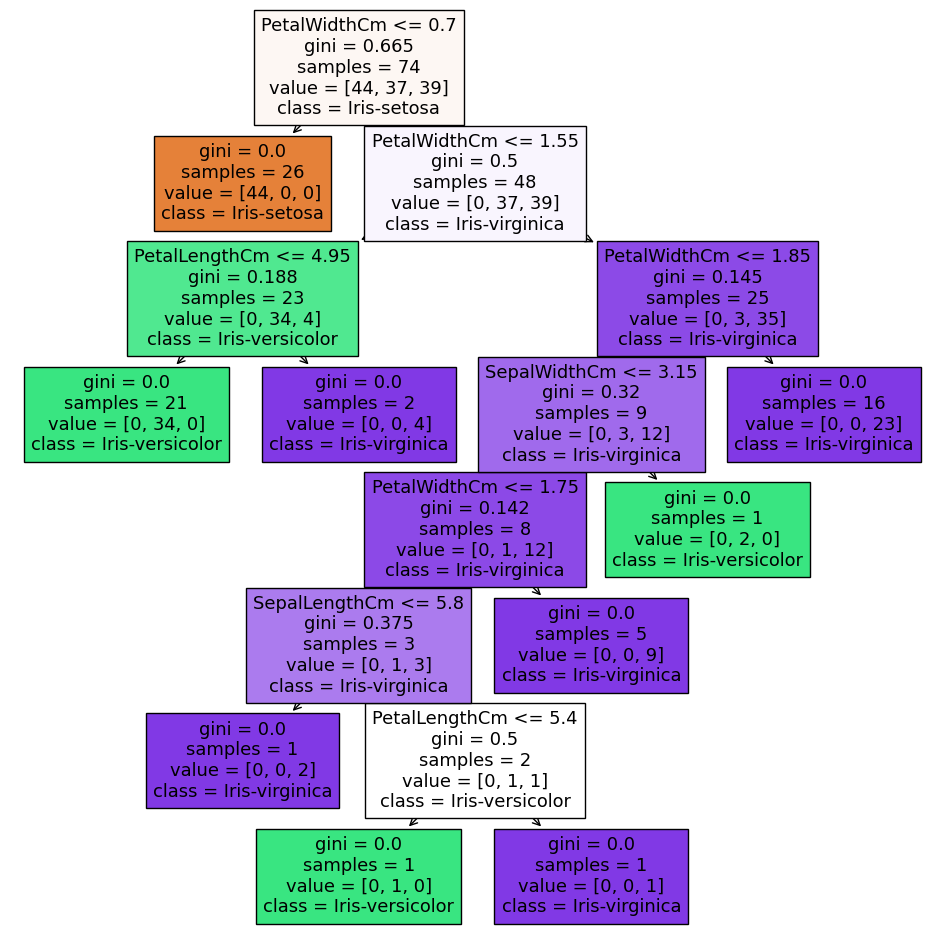

In [167]:
from sklearn import tree

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

tree_to_visualize = rf_model.estimators_[0]

feature_names = X.columns

class_names = y.unique()

plt.figure(figsize=(12, 12))
tree.plot_tree(tree_to_visualize,
               feature_names=feature_names,
               class_names=class_names,
               filled=True)
plt.savefig('random_forest_tree.png')
plt.show()
